In [1]:
import torch
import numpy as np
from torch.autograd import Variable
from torch import nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_decision_boundary(model, x, y):
    x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
    y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:,0], x[:,1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [6]:
np.random.seed(1)
m = 400
N = int(m / 2)
D = 2
x = np.zeros((m,D))
y = np.zeros((m,1), dtype='uint8')
a = 4
for j in range(2):
    ix = range(N*j, N*(j + 1))
    t = np.linspace(j * 3.12, (j + 1) * 3.12, N) + np.random.randn(N) * 0.2
    r = a * np.sin(4 * t) + np.random.randn(N) * 0.2
    x[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

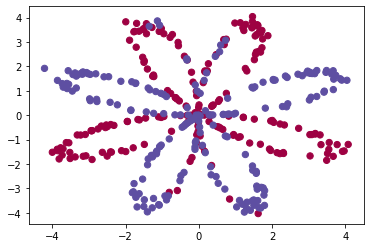

In [7]:
plt.scatter(x[:,0], x[:,1],c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

# logistic method

In [8]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

In [9]:
w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.randn(1))

optimizer = torch.optim.SGD([w,b], 1e-1)

def logistic_regression(x):
    return torch.mm(x, w) + b

criterion = nn.BCEWithLogitsLoss()

In [11]:
for e in range(100):
    out = logistic_regression(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(e + 1) % 20 == 0:
        print('epoch:{}, loss:{}'.format(e+1, loss.item()))

epoch:20, loss:0.7032424211502075
epoch:40, loss:0.6755517721176147
epoch:60, loss:0.6737697720527649
epoch:80, loss:0.6733753085136414
epoch:100, loss:0.6732327342033386


In [12]:
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = F.sigmoid(logistic_regression(x))
    out = (out > 0.5) * 1
    return out.data.numpy()

E:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'logistic regression')

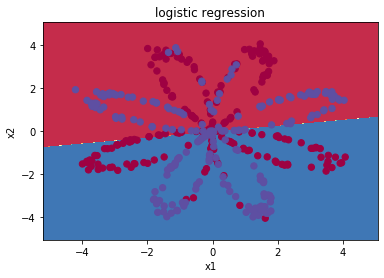

In [13]:
plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')

In [14]:
w1 = nn.Parameter(torch.randn(2,4) * 0.01)
b1 = nn.Parameter(torch.zeros(4))

w2 = nn.Parameter(torch.rand(4,1) *  0.01)
b2 = nn.Parameter(torch.zeros(1))

def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    return x2;

optimizer = torch.optim.SGD([w1,w2,b1,b2], 1.)

criterion = nn.BCEWithLogitsLoss()


for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out,Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(e + 1) % 1000 == 0:
        print('epoch:{}, loss:{}'.format(e + 1, loss.item()))

E:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch:1000, loss:0.28542569279670715
epoch:2000, loss:0.27234604954719543
epoch:3000, loss:0.2651911675930023
epoch:4000, loss:0.2603404223918915
epoch:5000, loss:0.25687873363494873
epoch:6000, loss:0.2543168067932129
epoch:7000, loss:0.25236064195632935
epoch:8000, loss:0.25082647800445557
epoch:9000, loss:0.24959586560726166
epoch:10000, loss:0.24858947098255157


In [15]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1,w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

Text(0.5, 1.0, '2 layer network')

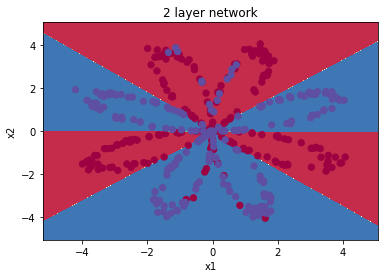

In [16]:
plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')

In [18]:
seq_net = nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1)
)

In [19]:
seq_net[0]

Linear(in_features=2, out_features=4, bias=True)

In [20]:
w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[ 0.6667,  0.6850],
        [-0.0327,  0.5682],
        [-0.6001,  0.1578],
        [ 0.6047,  0.1755]], requires_grad=True)


In [21]:
param = seq_net.parameters()

optim = torch.optim.SGD(param, 1.)

for e in range(10000):
    out = seq_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if(e + 1) % 1000 == 0:
        print('epoch:{}, loss:{}'.format(e + 1, loss.item()))

epoch:1000, loss:0.2599446177482605
epoch:2000, loss:0.24150331318378448
epoch:3000, loss:0.2331094890832901
epoch:4000, loss:0.22785066068172455
epoch:5000, loss:0.22412368655204773
epoch:6000, loss:0.22130148112773895
epoch:7000, loss:0.21907277405261993
epoch:8000, loss:0.2172674685716629
epoch:9000, loss:0.21578072011470795
epoch:10000, loss:0.21453946828842163


In [22]:
def plot_Seq(x):
    out = F.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

Text(0.5, 1.0, 'sequential')

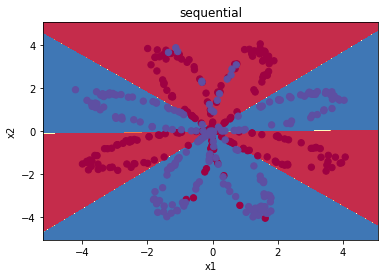

In [23]:
plot_decision_boundary(lambda x: plot_Seq(x), x.numpy(), y.numpy())
plt.title('sequential')

In [24]:
#参数和模型保存在一起
torch.save(seq_net, 'save_seq_net.pth')

E:\Anaconda\envs\pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
E:\Anaconda\envs\pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
E:\Anaconda\envs\pytorch\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Tanh. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [25]:
#读取保存的模型
seq_net1 = torch.load('save_seq_net.pth')
seq_net1

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [26]:
print(seq_net1[0].weight)

Parameter containing:
tensor([[10.6261, 12.5177],
        [-0.1747,  9.3013],
        [-8.6205,  9.5588],
        [10.8095, -3.2675]], requires_grad=True)


In [27]:
#只保存参数，不保存模型
torch.save(seq_net.state_dict(), 'save_seq_net_parameters.pth')

seq_net2 = nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1)
)

seq_net2.load_state_dict(torch.load('save_seq_net_parameters.pth'))

seq_net2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [28]:
print(seq_net2[0].weight)

Parameter containing:
tensor([[10.6261, 12.5177],
        [-0.1747,  9.3013],
        [-8.6205,  9.5588],
        [10.8095, -3.2675]], requires_grad=True)


In [29]:
class myNet(nn.Module):
    def __init__(self, inc,outc):
        super(myNet, self).__init__()
        self.layer1 = nn.Linear()
        self.layer2 = nn.Sequential(
            
        )
        
    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x)
        
        return x

In [30]:
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input,num_hidden)
        self.layer2 = nn.Tanh()
        self.layer3 = nn.Linear(num_hidden,num_output)
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x
    
mo_net = module_net(2 ,4, 1)

l1 = mo_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [31]:
print(l1.weight)

Parameter containing:
tensor([[ 0.6443,  0.0729],
        [ 0.4226, -0.2318],
        [-0.1537,  0.1104],
        [-0.3913, -0.0616]], requires_grad=True)


In [32]:
optimizer = torch.optim.SGD(mo_net.parameters(), 1.)

for e in range(10000):
    out = mo_net(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(e + 1) % 1000 == 0:
        print('epoch:{}, loss:{}'.format(e + 1, loss.item()))

epoch:1000, loss:0.2841741740703583
epoch:2000, loss:0.2718566954135895
epoch:3000, loss:0.2648524045944214
epoch:4000, loss:0.260092556476593
epoch:5000, loss:0.25669553875923157
epoch:6000, loss:0.25417986512184143
epoch:7000, loss:0.25225624442100525
epoch:8000, loss:0.2507452070713043
epoch:9000, loss:0.249531090259552
epoch:10000, loss:0.24853681027889252


In [33]:
torch.save(mo_net.state_dict(), 'module_net.pth')

In [35]:
net1 = nn.Sequential(
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 4),
    nn.Tanh(),
    nn.Linear(4, 2),
    nn.Tanh(),
    nn.Linear(2, 1)
)

optim = torch.optim.SGD(net1.parameters(), 0.5)

for e in range(20000):
    out = net1(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if(e +1) % 1000 == 0:
        print('epoch:{}, loss:{}'.format(e + 1, loss.item()))

epoch:1000, loss:0.2110201120376587
epoch:2000, loss:0.16844886541366577
epoch:3000, loss:0.15976503491401672
epoch:4000, loss:0.1517026275396347
epoch:5000, loss:0.15049928426742554
epoch:6000, loss:0.1596328616142273
epoch:7000, loss:0.1485055685043335
epoch:8000, loss:0.14791421592235565
epoch:9000, loss:0.14388294517993927
epoch:10000, loss:0.13979987800121307
epoch:11000, loss:0.1479095220565796
epoch:12000, loss:0.15983939170837402
epoch:13000, loss:0.1363685429096222
epoch:14000, loss:0.1398678421974182
epoch:15000, loss:0.12582358717918396
epoch:16000, loss:0.12563759088516235
epoch:17000, loss:0.13256961107254028
epoch:18000, loss:0.15075886249542236
epoch:19000, loss:0.17231187224388123
epoch:20000, loss:0.12813961505889893


Text(0.5, 1.0, 'mynet1')

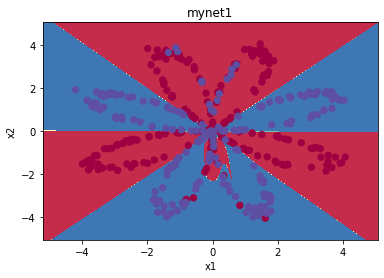

In [36]:
def plot_net1(x):
    out = F.sigmoid(net1(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

plot_decision_boundary(lambda x: plot_net1(x), x.numpy(), y.numpy())
plt.title('mynet1')